In [1]:
from collections import Counter
from itertools import islice

def generate_ngrams(text, n):
    """Generate n-grams from a given text."""
    tokens = text.split()
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def calculate_bow(sentences, n):
    """Calculate the Bag of Words (BoW) for a list of sentences using n-grams."""
    ngram_counts = Counter()
    for sentence in sentences:
        ngrams = generate_ngrams(sentence, n)
        ngram_counts.update(ngrams)
    return dict(ngram_counts)

# Input sentences
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Calculate BoW for 1-gram and 2-gram
bow_1gram = calculate_bow(sentences, 1)
bow_2gram = calculate_bow(sentences, 2)

print("1-Gram BoW:")
print(bow_1gram)
print("\n2-Gram BoW:")
print(bow_2gram)

1-Gram BoW:
{'This': 1, 'movie': 3, 'is': 1, 'SOOOO': 1, 'funny!!!': 1, 'What': 1, 'a': 1, 'movie!': 1, 'I': 1, 'never': 1, 'best': 1, 'ever!!!!!': 1, 'this': 1}

2-Gram BoW:
{'This movie': 1, 'movie is': 1, 'is SOOOO': 1, 'SOOOO funny!!!': 1, 'What a': 1, 'a movie!': 1, 'movie! I': 1, 'I never': 1, 'best movie': 1, 'movie ever!!!!!': 1, 'ever!!!!! this': 1, 'this movie': 1}


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import tensorflow as tf

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Load the IMDB dataset using TensorFlow
(train_data, _), (test_data, _) = tf.keras.datasets.imdb.load_data(path="imdb.npz", num_words=None, skip_top=0)

# Decode the IMDB reviews back into text
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decode_review = lambda review: " ".join([reverse_word_index.get(i - 3, "?") for i in review])

train_reviews = [decode_review(review) for review in train_data]

# Set the maximum vocabulary size and stop words
max_vocab_size = 5000
stop_words = stopwords.words('english')

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=max_vocab_size,
    stop_words=stop_words,
    norm=None  # Disable normalization
)

# Fit and transform the reviews using the vectorizer
X_tfidf = tfidf_vectorizer.fit_transform(train_reviews)

# Retrieve feature names and the resulting sparse matrix
feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the TF-IDF matrix shape and sample feature names
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"Sample Features: {feature_names[:10]}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mercy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 2s 1us/step
TF-IDF Matrix Shape: (25000, 5000)
Sample Features: ['00' '000' '10' '100' '11' '12' '13' '13th' '14' '15']


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
import nltk
import tensorflow as tf

# Ensure NLTK stopwords are downloaded
nltk.download('stopwords')

# Load the IMDB dataset using TensorFlow
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(path="imdb.npz", num_words=None, skip_top=0)

# Decode the IMDB reviews back into text
word_index = tf.keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decode_review = lambda review: " ".join([reverse_word_index.get(i - 3, "?") for i in review])

train_reviews = [decode_review(review) for review in train_data]
test_reviews = [decode_review(review) for review in test_data]

# Set parameters for TF-IDF
max_vocab_size = 5000
stop_words = stopwords.words('english')
ngram_range = (1, 1)  # Change to (1, 2) for bigrams, etc.

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features=max_vocab_size,
    stop_words=stop_words,
    norm='l2',  # Enable normalization for model training
    ngram_range=ngram_range
)

# Fit and transform the reviews
X_train_tfidf = tfidf_vectorizer.fit_transform(train_reviews)
X_test_tfidf = tfidf_vectorizer.transform(test_reviews)

# Train a binary classification model
model = LogisticRegression()
model.fit(X_train_tfidf, train_labels)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Classification Report:")
print(classification_report(test_labels, y_pred))

# Optional: Experiment by changing max_vocab_size, stop_words, and ngram_range to observe their effects.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mercy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [7]:
import math
from collections import Counter, defaultdict

def calculate_tf(document):
    """Calculate term frequency for a single document."""
    term_count = Counter(document)
    return {term: count for term, count in term_count.items()}

def calculate_idf(documents):
    """Calculate inverse document frequency for a set of documents."""
    idf = {}
    total_documents = len(documents)
    document_frequency = Counter()
    
    for document in documents:
        unique_terms = set(document)
        document_frequency.update(unique_terms)
    
    return idf, document_frequency

def calculate_tfidf(documents, use_sklearn_formula=True):
    """Calculate TF-IDF for a set of documents."""
    tokenized_documents = [doc.split() for doc in documents]
    idf, document_frequency = calculate_idf(tokenized_documents)
    
    tfidf = []
    for document in tokenized_documents:
        tf = calculate_tf(document)
        document_tfidf = {}
        for term, tf_value in tf.items():
            if use_sklearn_formula:
                document_tfidf[term] = tf_value * idf.get(term, 0)
            else:
                # Standard formula: tf * log(N / df)
                document_tfidf[term] = tf_value * math.log(len(documents) / document_frequency.get(term, 1))
        tfidf.append(document_tfidf)
    return tfidf

# Input sentences
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Calculate TF-IDF using scikit-learn formula
tfidf_sklearn = calculate_tfidf(sentences, use_sklearn_formula=True)

# Calculate TF-IDF using the standard formula
tfidf_standard = calculate_tfidf(sentences, use_sklearn_formula=False)

print("TF-IDF (scikit-learn formula):")
print(tfidf_sklearn)
print("\nTF-IDF (standard formula):")
print(tfidf_standard)


TF-IDF (scikit-learn formula):
[{'This': 0, 'movie': 0, 'is': 0, 'SOOOO': 0, 'funny!!!': 0}, {'What': 0, 'a': 0, 'movie!': 0, 'I': 0, 'never': 0}, {'best': 0, 'movie': 0, 'ever!!!!!': 0, 'this': 0}]

TF-IDF (standard formula):
[{'This': 1.0986122886681098, 'movie': 0.4054651081081644, 'is': 1.0986122886681098, 'SOOOO': 1.0986122886681098, 'funny!!!': 1.0986122886681098}, {'What': 1.0986122886681098, 'a': 1.0986122886681098, 'movie!': 1.0986122886681098, 'I': 1.0986122886681098, 'never': 1.0986122886681098}, {'best': 1.0986122886681098, 'movie': 0.8109302162163288, 'ever!!!!!': 1.0986122886681098, 'this': 1.0986122886681098}]


In [8]:
import math
import re
from collections import Counter, defaultdict

def preprocess_corpus(corpus):
    """Preprocess the corpus by removing special characters, URLs, converting to lowercase, and tokenizing."""
    processed_corpus = []
    for text in corpus:
        # Remove URLs
        text = re.sub(r'http\S+|www\S+', '', text)
        # Remove special characters and numbers
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        # Convert to lowercase
        text = text.lower()
        # Tokenize
        tokens = text.split()
        processed_corpus.append(tokens)
    return processed_corpus

def calculate_tf(document):
    """Calculate term frequency for a single document."""
    term_count = Counter(document)
    return {term: count for term, count in term_count.items()}

def calculate_idf(documents):
    """Calculate inverse document frequency for a set of documents."""
    idf = {}
    total_documents = len(documents)
    document_frequency = Counter()
    
    for document in documents:
        unique_terms = set(document)
        document_frequency.update(unique_terms)
    
    for term, df in document_frequency.items():
        idf[term] = math.log((1 + total_documents) / (1 + df)) + 1  # scikit-learn formula
    
    return idf, document_frequency

def calculate_tfidf(documents, use_sklearn_formula=True):
    """Calculate TF-IDF for a set of documents."""
    idf, document_frequency = calculate_idf(documents)
    
    tfidf = []
    for document in documents:
        tf = calculate_tf(document)
        document_tfidf = {}
        for term, tf_value in tf.items():
            if use_sklearn_formula:
                document_tfidf[term] = tf_value * idf.get(term, 0)
            else:
                # Standard formula: tf * log(N / df)
                document_tfidf[term] = tf_value * math.log(len(documents) / document_frequency.get(term, 1))
        tfidf.append(document_tfidf)
    return tfidf

# Input sentences
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Preprocess the corpus
processed_sentences = preprocess_corpus(sentences)

# Calculate TF-IDF using scikit-learn formula
tfidf_sklearn = calculate_tfidf(processed_sentences, use_sklearn_formula=True)

# Calculate TF-IDF using the standard formula
tfidf_standard = calculate_tfidf(processed_sentences, use_sklearn_formula=False)

print("TF-IDF (scikit-learn formula):")
print(tfidf_sklearn)
print("\nTF-IDF (standard formula):")
print(tfidf_standard)


TF-IDF (scikit-learn formula):
[{'this': 1.2876820724517808, 'movie': 1.0, 'is': 1.6931471805599454, 'soooo': 1.6931471805599454, 'funny': 1.6931471805599454}, {'what': 1.6931471805599454, 'a': 1.6931471805599454, 'movie': 1.0, 'i': 1.6931471805599454, 'never': 1.6931471805599454}, {'best': 1.6931471805599454, 'movie': 2.0, 'ever': 1.6931471805599454, 'this': 1.2876820724517808}]

TF-IDF (standard formula):
[{'this': 0.4054651081081644, 'movie': 0.0, 'is': 1.0986122886681098, 'soooo': 1.0986122886681098, 'funny': 1.0986122886681098}, {'what': 1.0986122886681098, 'a': 1.0986122886681098, 'movie': 0.0, 'i': 1.0986122886681098, 'never': 1.0986122886681098}, {'best': 1.0986122886681098, 'movie': 0.0, 'ever': 1.0986122886681098, 'this': 0.4054651081081644}]


In [24]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Mercy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
print(nltk.data.path)


['C:\\Users\\Mercy/nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\share\\nltk_data', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\lib\\nltk_data', 'C:\\Users\\Mercy\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [57]:
import numpy as np
from collections import defaultdict
from itertools import chain
import re

# Step 1: Preprocess the corpus
def preprocess_corpus(corpus):
    corpus = [re.sub(r"[^\w\s]", "", sentence.lower()) for sentence in corpus]
    return [sentence.split() for sentence in corpus]

# Step 2: Create a vocabulary and word index mapping
def create_vocab(sentences):
    word_to_index = {}
    index_to_word = {}
    vocab = set(chain.from_iterable(sentences))
    for i, word in enumerate(vocab):
        word_to_index[word] = i
        index_to_word[i] = word
    return word_to_index, index_to_word

# Step 3: Generate training data (word pairs)
def generate_training_data(sentences, word_to_index, window_size=2):
    data = []
    for sentence in sentences:
        for i, word in enumerate(sentence):
            target_word_idx = word_to_index[word]
            context_indices = list(range(max(0, i - window_size), min(len(sentence), i + window_size + 1)))
            context_indices.remove(i)
            for context_idx in context_indices:
                context_word_idx = word_to_index[sentence[context_idx]]
                data.append((target_word_idx, context_word_idx))
    return data

# Step 4: Train a Word2Vec model (Skip-gram with Negative Sampling)
class Word2Vec:
    def __init__(self, vocab_size, embedding_dim, learning_rate=0.01):
        self.vocab_size = vocab_size
        self.embedding_dim = embedding_dim
        self.learning_rate = learning_rate
        self.W1 = np.random.uniform(-0.8, 0.8, (vocab_size, embedding_dim))  # Input embedding
        self.W2 = np.random.uniform(-0.8, 0.8, (embedding_dim, vocab_size))  # Output embedding

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0)

    def train(self, training_data, epochs=10, negative_samples=5):
        for epoch in range(epochs):
            loss = 0
            for target, context in training_data:
                # Forward pass
                h = self.W1[target]  # Hidden layer
                u = np.dot(self.W2.T, h)  # Output layer
                y_pred = self.softmax(u)

                # Create target vector
                y_true = np.zeros(self.vocab_size)
                y_true[context] = 1

                # Compute gradients
                error = y_pred - y_true
                dW2 = np.outer(h, error)
                dW1 = np.dot(self.W2, error)

                # Update weights
                self.W1[target] -= self.learning_rate * dW1
                self.W2 -= self.learning_rate * dW2

                loss += -np.log(y_pred[context])
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}")

    def get_embedding(self, word, word_to_index):
        return self.W1[word_to_index[word]]

# Example Usage
corpus = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Preprocess and generate vocabulary
processed_corpus = preprocess_corpus(corpus)
word_to_index, index_to_word = create_vocab(processed_corpus)

# Generate training data
training_data = generate_training_data(processed_corpus, word_to_index)

# Train Word2Vec model
vocab_size = len(word_to_index)
embedding_dim = 10
word2vec = Word2Vec(vocab_size, embedding_dim)
word2vec.train(training_data, epochs=100)

# Get embeddings
print("\nEmbedding for 'movie':")
print(word2vec.get_embedding('movie', word_to_index))


Epoch 1/100, Loss: 105.0747
Epoch 2/100, Loss: 103.4206
Epoch 3/100, Loss: 101.9123
Epoch 4/100, Loss: 100.5204
Epoch 5/100, Loss: 99.2230
Epoch 6/100, Loss: 98.0038
Epoch 7/100, Loss: 96.8503
Epoch 8/100, Loss: 95.7531
Epoch 9/100, Loss: 94.7052
Epoch 10/100, Loss: 93.7013
Epoch 11/100, Loss: 92.7377
Epoch 12/100, Loss: 91.8118
Epoch 13/100, Loss: 90.9218
Epoch 14/100, Loss: 90.0667
Epoch 15/100, Loss: 89.2457
Epoch 16/100, Loss: 88.4585
Epoch 17/100, Loss: 87.7049
Epoch 18/100, Loss: 86.9846
Epoch 19/100, Loss: 86.2970
Epoch 20/100, Loss: 85.6416
Epoch 21/100, Loss: 85.0174
Epoch 22/100, Loss: 84.4232
Epoch 23/100, Loss: 83.8575
Epoch 24/100, Loss: 83.3188
Epoch 25/100, Loss: 82.8054
Epoch 26/100, Loss: 82.3153
Epoch 27/100, Loss: 81.8469
Epoch 28/100, Loss: 81.3982
Epoch 29/100, Loss: 80.9677
Epoch 30/100, Loss: 80.5536
Epoch 31/100, Loss: 80.1546
Epoch 32/100, Loss: 79.7693
Epoch 33/100, Loss: 79.3966
Epoch 34/100, Loss: 79.0352
Epoch 35/100, Loss: 78.6842
Epoch 36/100, Loss: 78.34

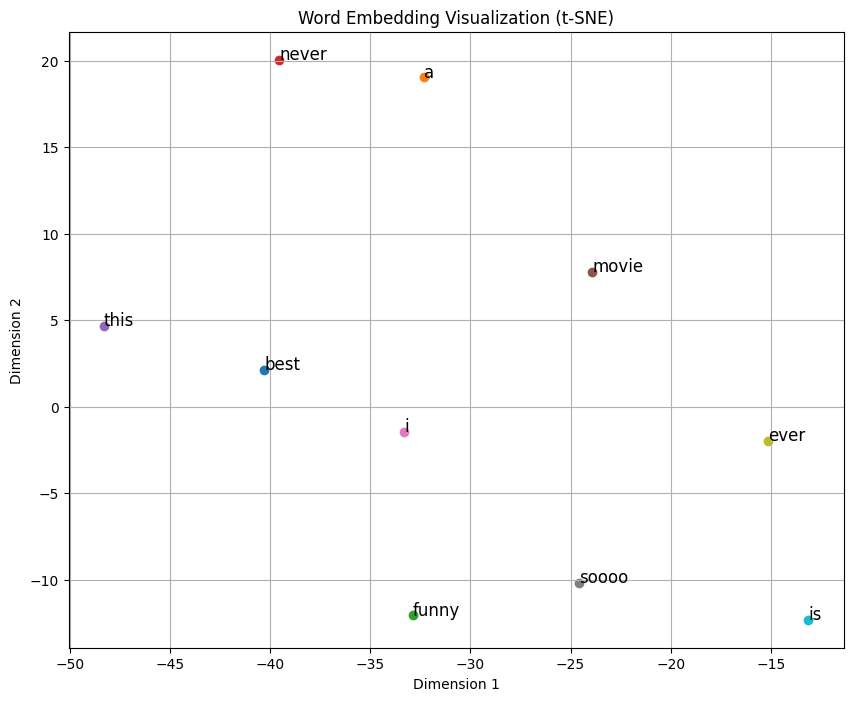

Most similar words to 'movie':
movie: 1.0000
a: 0.1527
ever: 0.0367
this: -0.0298
i: -0.0354


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 1: Find similar words using cosine similarity
def most_similar(word, word_to_index, index_to_word, embedding_matrix, top_n=5):
    if word not in word_to_index:
        return f"'{word}' not in vocabulary"
    
    word_index = word_to_index[word]
    word_vector = embedding_matrix[word_index]
    
    # Compute cosine similarity
    similarities = {}
    for i, vector in enumerate(embedding_matrix):
        similarity = np.dot(word_vector, vector) / (np.linalg.norm(word_vector) * np.linalg.norm(vector))
        similarities[index_to_word[i]] = similarity

    # Sort by similarity and return top N results
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

# Step 2: Visualize word embeddings using t-SNE
def visualize_embeddings(word_to_index, embedding_matrix, num_words=20):
    # Pick the first N words for visualization
    words = list(word_to_index.keys())[:num_words]
    indices = [word_to_index[word] for word in words]
    embeddings_subset = embedding_matrix[indices]

    # Use t-SNE to reduce dimensionality to 2D
    tsne = TSNE(n_components=2, random_state=42, perplexity=5)
    reduced_embeddings = tsne.fit_transform(embeddings_subset)
    
    # Plot the embeddings
    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        x, y = reduced_embeddings[i]
        plt.scatter(x, y)
        plt.text(x + 0.01, y + 0.01, word, fontsize=12)
    plt.title("Word Embedding Visualization (t-SNE)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.grid(True)
    plt.show()

# Example Usage
# Get the embedding matrix and word-index mappings
embedding_matrix = word2vec.W1

# Visualize the embeddings
visualize_embeddings(word_to_index, embedding_matrix, num_words=10)

# Find most similar words to "movie"
print("Most similar words to 'movie':")
similar_words = most_similar("movie", word_to_index, index_to_word, embedding_matrix)
for word, similarity in similar_words:
    print(f"{word}: {similarity:.4f}")


In [72]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Step 1: Load Pre-trained Word Embeddings (GloVe in this example)
def load_glove_embeddings(filepath, embedding_dim=100):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Step 2: Load IMDB Dataset
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Step 3: Map the word indices back to words
word_index = imdb.get_word_index()
index_to_word = {index + 3: word for word, index in word_index.items()}
index_to_word[0] = "<PAD>"
index_to_word[1] = "<START>"
index_to_word[2] = "<UNK>"

# Decode review for better understanding
def decode_review(text):
    return " ".join([index_to_word.get(i, "?") for i in text])

# Step 4: Pad sequences to ensure uniform input length
maxlen = 300
train_data = pad_sequences(train_data, maxlen=maxlen, padding='post')
test_data = pad_sequences(test_data, maxlen=maxlen, padding='post')

# Step 5: Create an Embedding Matrix
embedding_dim = 100
glove_path = glove_path = r'C:\Users\Mercy\Documents\glove.6B.100d.txt'

glove_embeddings = load_glove_embeddings(glove_path, embedding_dim)

# Initialize embedding matrix
embedding_matrix = np.zeros((10000, embedding_dim))
for word, i in word_index.items():
    if i < 10000:  # Restrict to top 10,000 words
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector  # Words in GloVe
        else:
            embedding_matrix[i] = np.random.uniform(-0.01, 0.01, embedding_dim)  # OOV words

# Step 6: Build the Model
model = Sequential([
    Embedding(input_dim=10000, output_dim=embedding_dim, weights=[embedding_matrix],
              input_length=maxlen, trainable=False),  # Pre-trained embeddings
    Bidirectional(LSTM(64, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 7: Train the Model
history = model.fit(train_data, train_labels, epochs=5, batch_size=64,
                    validation_split=0.2, verbose=1)

# Step 8: Evaluate the Model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\Mercy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,000,000 (3.81 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 1,000,000 (3.81 MB)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 322s 999ms/step - accuracy: 0.5041 - loss: 0.6960 - val_accuracy: 0.5174 - val_loss: 0.6920
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 408s 1s/step - accuracy: 0.5396 - loss: 0.6894 - val_accuracy: 0.5716 - val_loss: 0.6755
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 346s 1s/step - accuracy: 0.5877 - loss: 0.6727 - val_accuracy: 0.6352 - val_loss: 0.6382
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 371s 1s/step - accuracy: 0.6530 - loss: 0.6319 - val_accuracy: 0.6946 - val_loss: 0.5896
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.7019 - loss: 0.5853 - val_accuracy: 0.6878 - val_loss: 0.5829
782/782 ━━━━━━━━━━━━━━━━━━━━ 118s 151ms/step - accuracy: 0.6915 - loss: 0.5842
Test Accuracy: 0.6916
